In [1]:
import networkx as nx

from foodwebs.foodweb import FoodWeb
from foodwebs.foodweb_io import read_from_SCOR


from foodwebs.visualization import draw_trophic_flows_heatmap, show_trophic_flows_distribution

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [2]:
import glob
food_webs = [read_from_SCOR(net_path) for net_path in glob.glob('./data/*')]

for web in food_webs:
    print(f'{web.title[:30]} --> {web.n}, {web.n_living}')

Upper Chesapeake Bay in Summer --> 34, 28
Albatross Bay _ 465 ,   bay/fj --> 99, 92
USA, Mid Atlantic Bight _ 99 , --> 55, 54
Flow network of St Marks febs2 --> 51, 40
Table 9. Flow data for the Thu --> 33, 29
Alaska, Prince William Sound _ --> 19, 18
"Mdloti Network, March 2003, i --> 46, 43
Bothnian Bay; Sandbert, et al. --> 12, 10
FLORIDA BAY TROPHIC EXCHANGE M --> 125, 104
Oneida Post ZM Unbalanced      --> 76, 73
Bay of Biscay _ 335 ,   contin --> 32, 30


In [3]:
x = food_webs[0]

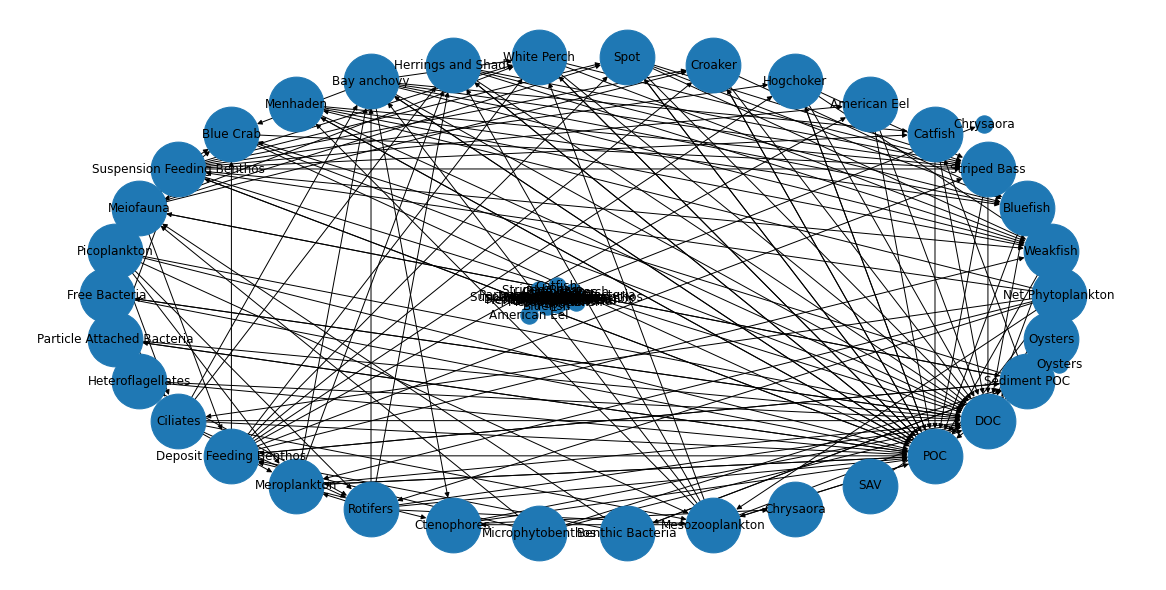

In [4]:
graph = x.get_graph()

pos=nx.circular_layout(graph)
nx.draw(graph, with_labels=True)
nx.draw(graph, pos, node_size=3000, with_labels=True)

In [82]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(10, 0.25)


In [74]:
levels = {0: 0,
         1: 1,
         2: 1,
         3: 1,
         4: 2,
         5: 2,
         6: 2,
         7: 2,
         8: 2,
         9: 3}

In [83]:
for n in G.nodes(data=True):
#     n[1]['pos'][0] = levels[n[0]]
    print(n)

(0, {'pos': [0.8825453548162837, 0.21731802676143508]})
(1, {'pos': [0.4017627596249391, 0.6118716472963874]})
(2, {'pos': [0.7313199013023512, 0.3172125871407395]})
(3, {'pos': [0.9384362215023552, 0.830668390370724]})
(4, {'pos': [0.884787199277877, 0.2690183922585132]})
(5, {'pos': [0.9325290265475125, 0.19210667877799992]})
(6, {'pos': [0.3176724402725185, 0.045245377934507336]})
(7, {'pos': [0.8033200210713474, 0.46149207715556706]})
(8, {'pos': [0.3880745468876142, 0.8558282392518044]})
(9, {'pos': [0.8493288106539554, 0.47216049065408405]})


In [84]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

    
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [85]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f'# of connections: {len(adjacencies[1])}\nNode: {node}')

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

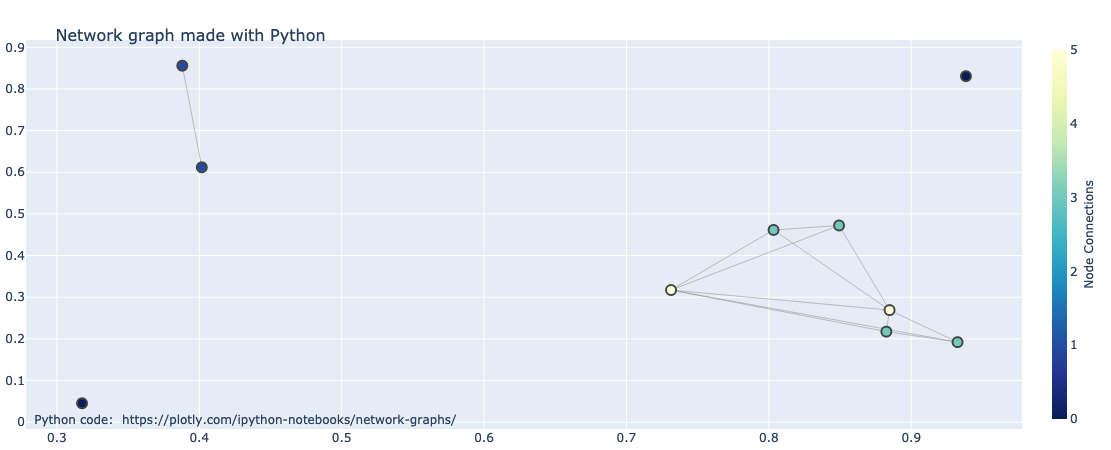

In [86]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=True, zeroline=False, showticklabels=True),
                yaxis=dict(showgrid=True, zeroline=False, showticklabels=True))
                )
fig.show()


In [81]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network(notebook=True)
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show("nx.html")


In [16]:
a = {x: {'level': attrs['TrophicLevel'] }for x, attrs in nx_graph.nodes(data=True)} 

nx.set_node_attributes(nx_graph, a)
nx_graph.nodes(data=True)

NodeDataView({'Mesozooplankton': {'IsAlive': True, 'Biomass': 276.0, 'Import': 0.0, 'Export': 0.0, 'Respiration': 4275.792, 'TrophicLevel': 1.9999999999999947, 'size': 10, 'level': 1.9999999999999947}, 'Inf. zoobenthos': {'IsAlive': True, 'Biomass': 225.0, 'Import': 0.0, 'Export': 0.003, 'Respiration': 4005.0, 'TrophicLevel': 2.2799999999999705, 'size': 10, 'level': 2.2799999999999705}, 'Intertidal inv.': {'IsAlive': True, 'Biomass': 6.24, 'Import': 0.0, 'Export': 0.0, 'Respiration': 37.44, 'TrophicLevel': 2.26, 'size': 10, 'level': 2.26}, 'Macrozooplankton': {'IsAlive': True, 'Biomass': 92.0, 'Import': 0.0, 'Export': 0.0, 'Respiration': 648.6, 'TrophicLevel': 2.7499999999999973, 'size': 10, 'level': 2.7499999999999973}, 'Epi. zoobenthos': {'IsAlive': True, 'Biomass': 1.3, 'Import': 0.0, 'Export': 0.143, 'Respiration': 7.8, 'TrophicLevel': 2.660000000000007, 'size': 10, 'level': 2.660000000000007}, 'Wild salmon fry': {'IsAlive': True, 'Biomass': 0.014, 'Import': 0.0, 'Export': 0.0, 'Re

In [22]:
g = nx.Graph(nx_graph)

g.remove_edges_from([x for x in g.edges() if x[1] == 'Detritus'])

In [30]:
from pyvis.network import Network
import networkx as nx
nx_graph = food_webs[1].get_graph()

a = {x: {'level': attrs['TrophicLevel'] } for x, attrs in nx_graph.nodes(data=True)} 

nx.set_node_attributes(nx_graph, a)
nx_graph.nodes(data=True)


nt = Network(notebook=True, height="500px", width="100%", layout=True, directed=True)
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show_buttons(filter_="physics")
nt.show("nx.html")
